# Tasca M7 T01 - Classificació

Utilitzarem el dataset "wineData.txt" que conté informació relacionada amb les característiques químiques de diferents vins cultivats a Itàlia.



<h2>Data Set Characteristics</h2>

<p>- Nombre d'instàncies</p>

<pre>
classe 1: 159
classe 2: 71
classe 3: 48
</pre>

<p>- Nombre d'atributs : 13</p>

<p>Fonts:</p>
<pre>
(a) Forina, M. et al, PARVUS - An Extendible Package for Data
    Exploració, Classificació i Correlació. Institut de Farmàcia
    i Anàlisi i Tecnologies dels Aliments, Via Brigata Salerno,
    16147 Gènova, Itàlia.
</pre>

<p>Attribute Information:</p>

<ol>
  <li>Alcohol</li>
  <li>Àcid màlic</li>
  <li>Freixes</li>
  <li>Alcalinitat de la cendra</li>
  <li>Magnesi</li>
  <li>Fenols totals</li>
  <li>Flavonoides</li>
  <li>Fenols no flavonoides</li>
  <li>Proantocianines</li>
  <li>Intensitat del color</li>
  <li>Tonalitat</li>
  <li>DO280/DO315 de vins diluïts</li>
  <li>Prolina</li>
</ol>

<p>- Falten valors d'atributs:</p>

<p>Cap</p>

<p>- Distribució de classes: nombre d'instàncies per classe</p>

<pre>
classe 1: 159
classe 2: 71
classe 3: 48
</pre>

In [487]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

from lazypredict.Supervised import LazyClassifier



In [488]:
df = pd.read_csv('wineData.txt', header=None)
df.columns = ['Class', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Mg', 'Total phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']


In [489]:
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Mg,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [490]:
df.describe()

,Class,Alcohol,Malic,Ash,Alcalinity,Mg,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [491]:
df.shape

(178, 14)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Mg               178 non-null    int64  
 6   Total phenols    178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color intensity  178 non-null    float64
 11  Hue              178 non-null    float64
 12  OD280/OD315      178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Comprovem si hi ha valors nuls i ens indica que no.

In [493]:
df.isnull().sum()


Class              0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Mg                 0
Total phenols      0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color intensity    0
Hue                0
OD280/OD315        0
Proline            0
dtype: int64

Mirem quina correlació hi ha entre valors.

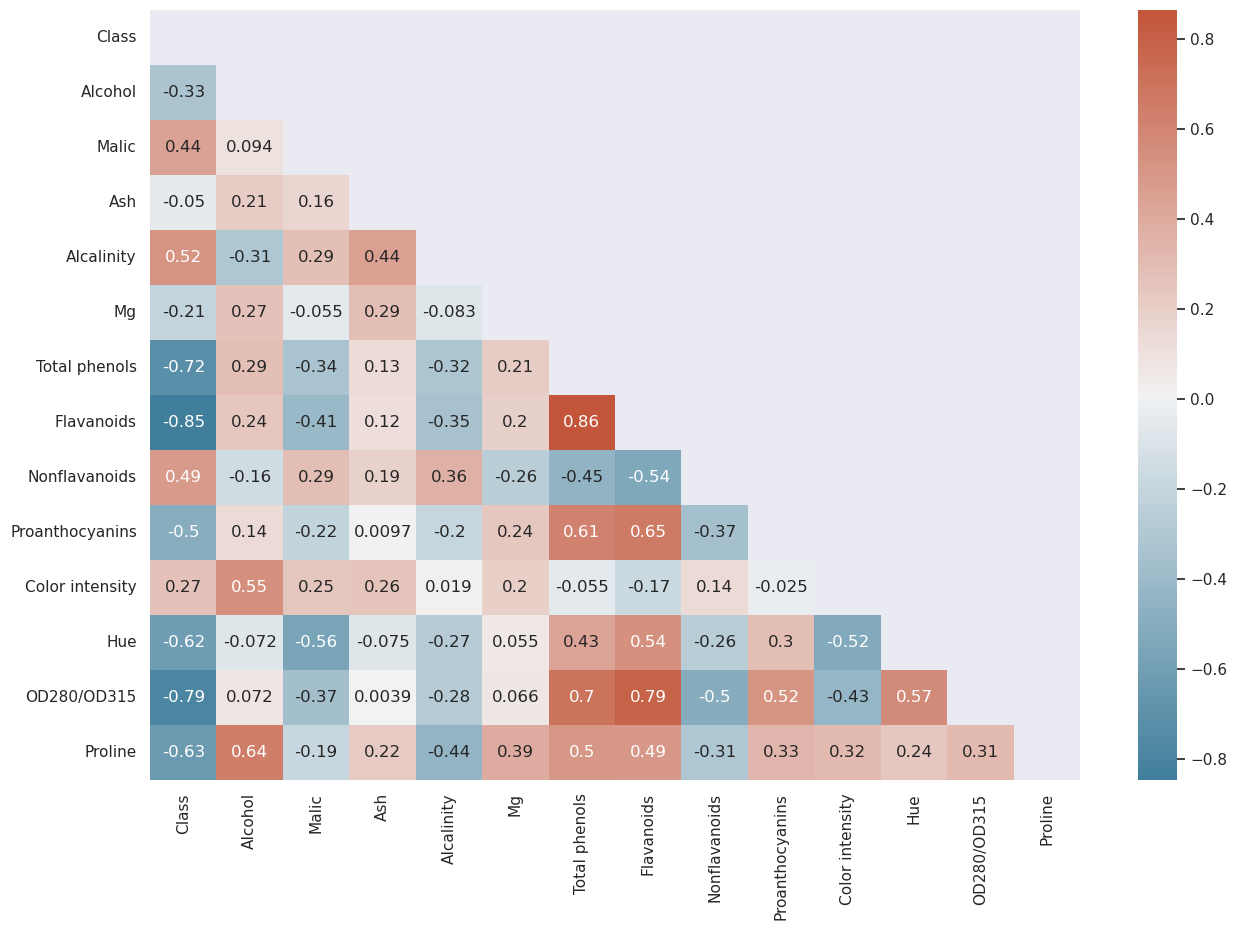

In [494]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

En primer lloc, notem la gran relació de la variable 'Class' amb totes les altres, tant positiva com negativa.
Podríem destacar, la relació altíssima que tenen 'Flavanoids' amb 'Total phenols' i la poca rellevància de les variables 'Ash' i 'Mg' amb la resta de les variables.
Tot i que aquestes últimes tenen una correlació molt baixa, no soc partidària d'eliminar cap columna, ja que tot pot influir en el resultat final.

Text(0.5, 0.98, 'Distribució de les variables numèriques')

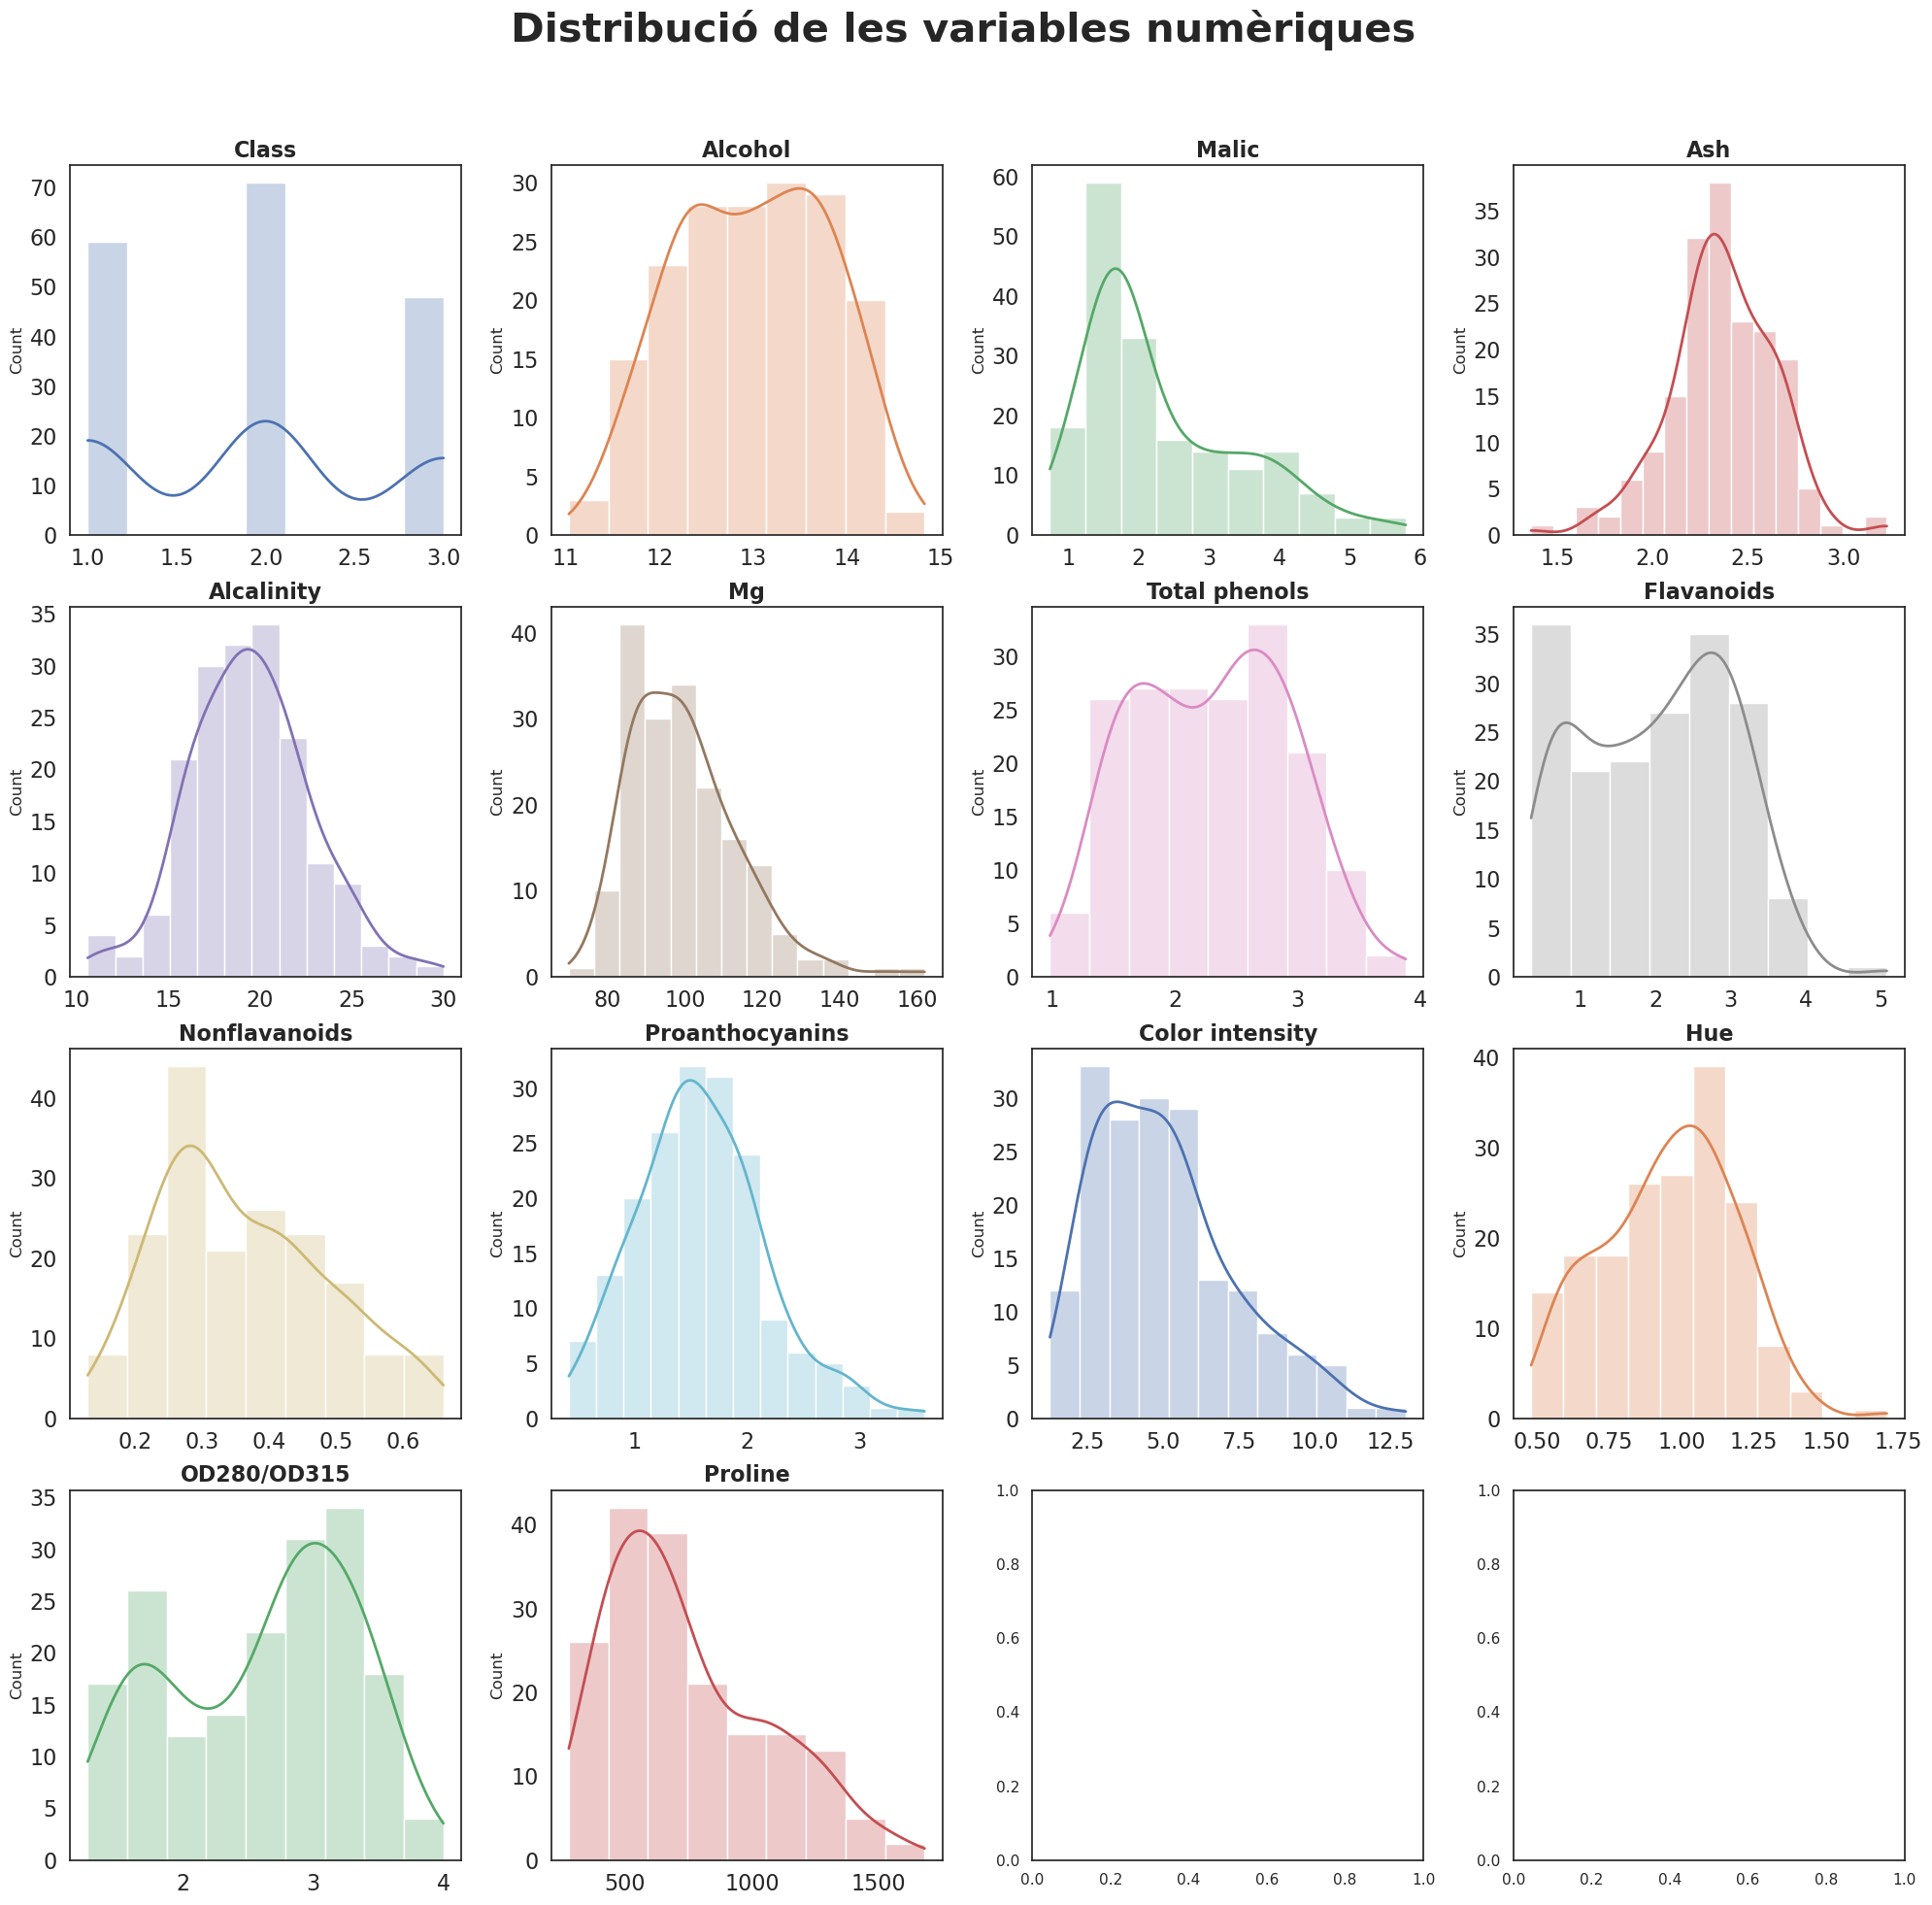

In [495]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axes = axes.flat

for i, colum in enumerate(df):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables numèriques', fontsize = 30, fontweight = "bold")


<Figure size 600x300 with 0 Axes>

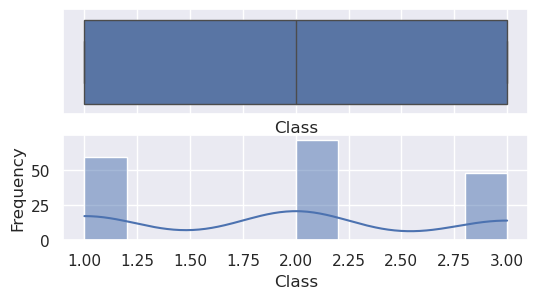

<Figure size 600x300 with 0 Axes>

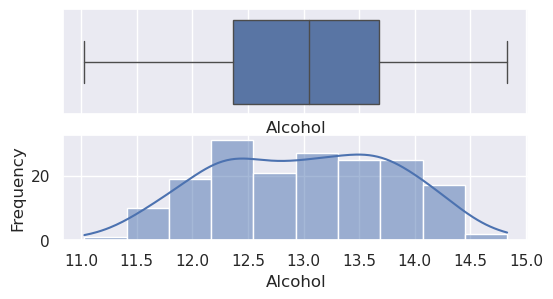

<Figure size 600x300 with 0 Axes>

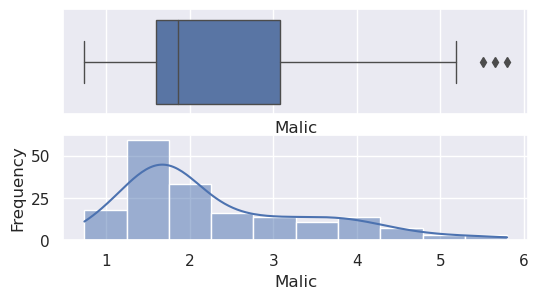

<Figure size 600x300 with 0 Axes>

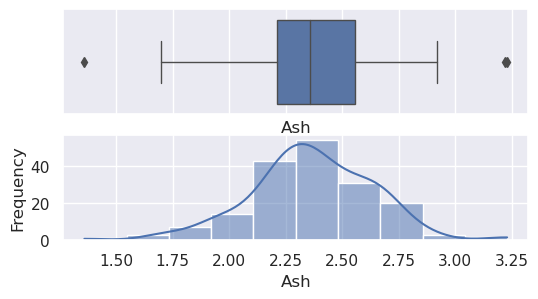

<Figure size 600x300 with 0 Axes>

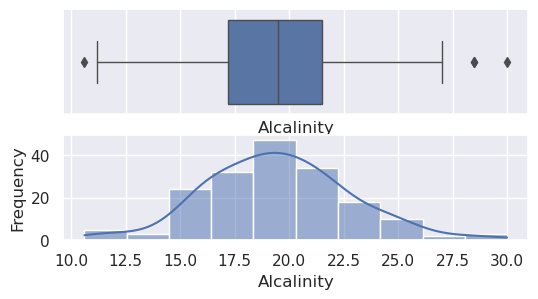

<Figure size 600x300 with 0 Axes>

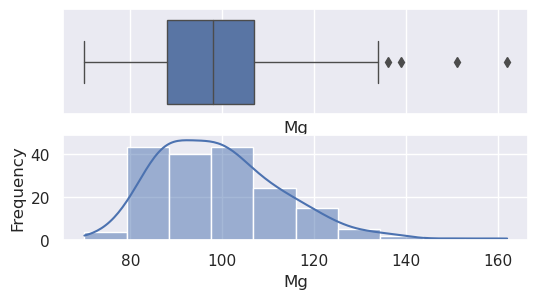

<Figure size 600x300 with 0 Axes>

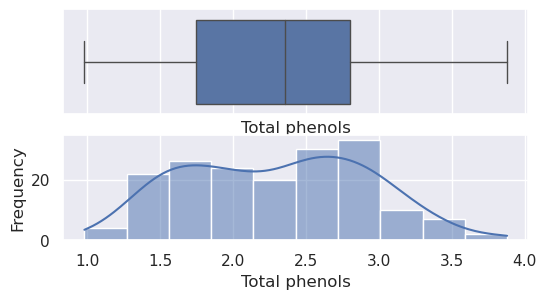

<Figure size 600x300 with 0 Axes>

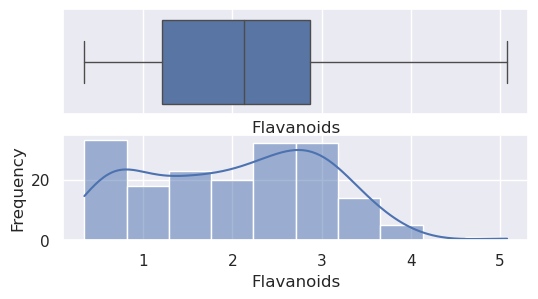

<Figure size 600x300 with 0 Axes>

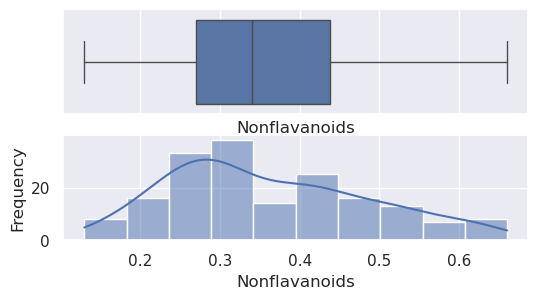

<Figure size 600x300 with 0 Axes>

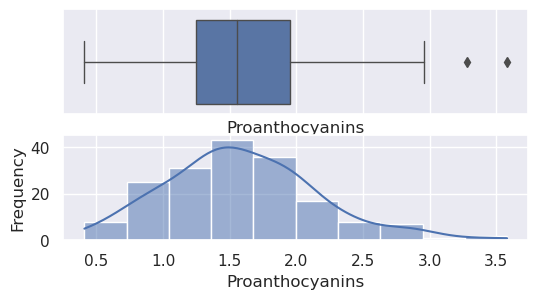

<Figure size 600x300 with 0 Axes>

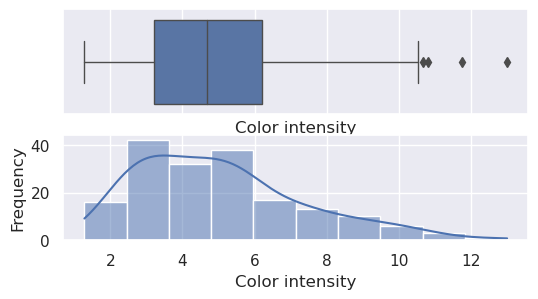

<Figure size 600x300 with 0 Axes>

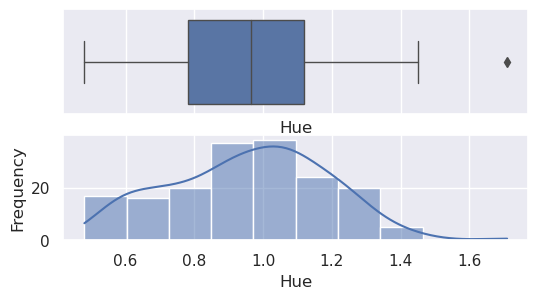

<Figure size 600x300 with 0 Axes>

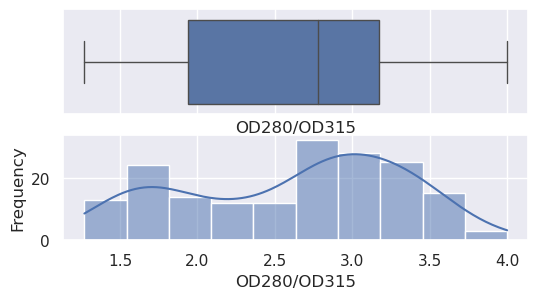

<Figure size 600x300 with 0 Axes>

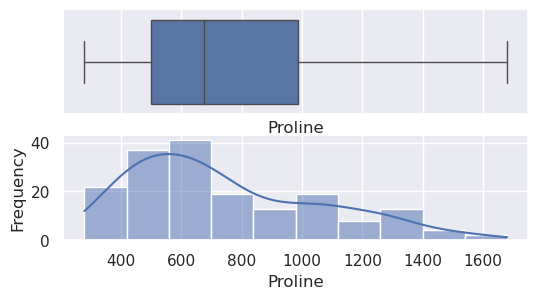

In [496]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 3)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
    
    
    

Amb els box plots anteriors ens és molt més fàcil individuar visualment les variables amb outliers ('Malic', 'Ash', 'Mg', 'Proanthocyanins','Color intensity','Hue')


Es comprova si les variables segueixen una distribució normal mitjançant el Test de Shapiro.

In [497]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  Class amb un p-value de  3.526998097335039e-14
Podem rebutjar l'hipotesis nula

Per la variable  Alcohol amb un p-value de  0.020050711929798126
Podem rebutjar l'hipotesis nula

Per la variable  Malic amb un p-value de  2.94582247484243e-10
Podem rebutjar l'hipotesis nula

Per la variable  Ash amb un p-value de  0.038691021502017975
Podem rebutjar l'hipotesis nula

Per la variable  Alcalinity amb un p-value de  0.26394858956336975
No podem rebutjar hipotesis nula

Per la variable  Mg amb un p-value de  6.345416068143095e-07
Podem rebutjar l'hipotesis nula

Per la variable  Total phenols amb un p-value de  0.0043947165831923485
Podem rebutjar l'hipotesis nula

Per la variable  Flavanoids amb un p-value de  1.6790636436780915e-05
Podem rebutjar l'hipotesis nula

Per la variable  Nonflavanoids amb un p-value de  0.00010552681487752125
Podem rebutja

Basant-nos en els gràfics anteriors i en el shapiro test aplicarem el següent:

- Estandardització per l'única gaussiana ('Alcalinity')
- RobustScaler per les que contenen outliers ('Malic', 'Ash', 'Mg', 'Proanthocyanins','Color intensity','Hue')
- Normalització per la resta ('Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoids','OD280/OD315', 'Proline')

In [498]:
columnsNorm = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoids','OD280/OD315', 'Proline']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['Malic', 'Ash', 'Mg', 'Proanthocyanins','Color intensity','Hue']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

columnsEstd= ['Alcalinity']
scaler = preprocessing.StandardScaler().fit(df[columnsEstd])
df[columnsEstd] = scaler.transform(df[columnsEstd])




Mirant la taula de correlació decidim que el nostre target serà "class" i passem a fer el train/test dividint-lo en un 80 -20 respectivament.



In [499]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)


print("Exemples utilitzats per al Train: ", len(X_train))
print("Exemples utilitzats per al Test: ", len(y_test))


Exemples utilitzats per al Train:  142
Exemples utilitzats per al Test:  36


# - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

   
Fem el LazyClassifier per individuar quin seria el millor model a utilitzar.
  

In [500]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:00<00:00, 52.20it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
NearestCentroid                    1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
LabelSpreading                     1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
NuSVC                              1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
RidgeClassifier                    1.00 

Primer model, el KNeighborsClassifier

In [501]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("La precisió d'aquest model és de:", accuracy_knn)


La precisió d'aquest model és de: 0.9444444444444444


El segon model serà el SVC 

In [502]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = knn.predict(X_test)

accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
print("La precisió d'aquest model és de:", accuracy_svc)

La precisió d'aquest model és de: 0.9444444444444444


  
En el tercer cas hem triat un model BernoulliNB, bastant més dolent segons el LazyClassifier, per poder comparar-lo amb els dos anteriors.
  

In [516]:
be = BernoulliNB()
be.fit(X_train, y_train)
y_pred_be = be.predict(X_test)
accuracy_be = metrics.accuracy_score(y_test, y_pred_be)
print("La precisió d'aquest model és de:", accuracy_be)

La precisió d'aquest model és de: 0.8333333333333334


# -Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [523]:
#confusion
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
cf_matrix_be = confusion_matrix(y_test, y_pred_be)

#f1
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_be = f1_score(y_test, y_pred_be, average='macro')

#accuracy 
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
accuracy_be = metrics.accuracy_score(y_test, y_pred_be)


metrics2 = pd.DataFrame( data = [['KNeighborsClassifier', accuracy_knn, f1_knn],
                                  ['SVC', accuracy_svc, f1_svc],
                                  ['BernoulliNB', accuracy_be, f1_be]],
                                  columns = ['Model', 'ACC', 'F1'])
metrics2.head()



,Model,ACC,F1
0,KNeighborsClassifier,0.94,0.95
1,SVC,0.94,0.95
2,BernoulliNB,0.83,0.83


[Text(0.5, 1.0, 'Confusion matrix KNeighborsClassifier')]

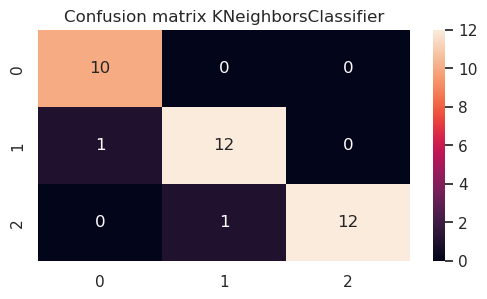

In [524]:
sns.heatmap(cf_matrix_knn, annot=True).set(title='Confusion matrix KNeighborsClassifier')


[Text(0.5, 1.0, 'Confusion matrix SVC')]

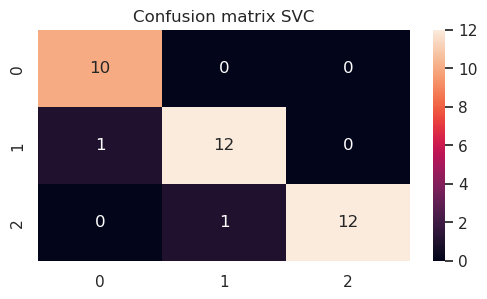

In [525]:
sns.heatmap(cf_matrix_svc, annot=True).set(title='Confusion matrix SVC')

[Text(0.5, 1.0, 'Confusion matrix BernoulliNB')]

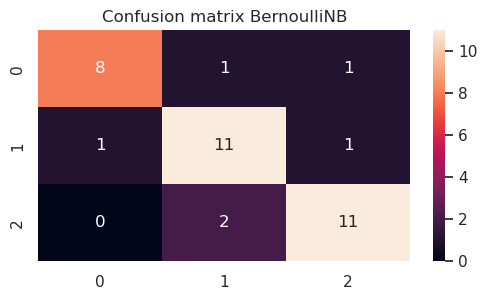

In [526]:

sns.heatmap(cf_matrix_be, annot=True).set(title='Confusion matrix BernoulliNB')


El que podem notar amb la matriu de confusió és el següent:

- Model KN: el model ha fet un error en la classificació d'una instancia de la classe 2 i una instancia de la 3.

- Model SVC: és exactament igual que l'anterior.

- Model BE: en aquest cas el model s'ha equivocat en classificar en vàries ocasions assignant registres on no tocaven.
    
En resum, els models KNeighborsClassifier i SVC són identics en termes de precisió (accurancy) i puntuació ( F1) apropant-se molt al màxim (1) , mentre que el model BernoulliNB és lleugerament inferior en comparació amb els altres dos models tot i que no és massa dolent en general.
    

# - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [528]:
KNeighborsClassifier().get_params().keys()



dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [529]:
knn = KNeighborsClassifier(n_neighbors=4 , leaf_size = 30, weights = "distance")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("La precisió d'aquest model és de:", accuracy_knn)



La precisió d'aquest model és de: 1.0


In [530]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [531]:
svc = SVC(kernel='linear',degree=3, coef0=1.0, C=5)
svc.fit(X_train, y_train)
y_pred_svc = knn.predict(X_test)

accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
print("La precisió d'aquest model és de:", accuracy_svc)



La precisió d'aquest model és de: 1.0


In [532]:
BernoulliNB().get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

In [533]:
be = BernoulliNB(alpha=2.0, binarize=0.5, class_prior=None, fit_prior=False)
be.fit(X_train, y_train)
y_pred_be = be.predict(X_test)

accuracy_be = metrics.accuracy_score(y_test, y_pred_be)
print("La precisió d'aquest model és de:", accuracy_be)

La precisió d'aquest model és de: 0.9444444444444444


# - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



In [534]:


#Cross Validation
cv_knn = cross_val_score(knn, X, y, cv=5, scoring='f1_macro')
cv_svc = cross_val_score(svc, X, y, cv=5, scoring='f1_macro')
cv_be = cross_val_score(be, X, y, cv=5, scoring='f1_macro')
cv_cl_mean = [cv_knn.mean(), cv_svc.mean(), cv_be.mean()]




metrics1 = pd.DataFrame( data = [['KNeighborsClassifier', accuracy_knn, f1_knn],
                                  ['SVC', accuracy_svc, f1_svc],
                                  ['BernoulliNB', accuracy_be, f1_be]],
                                  columns = ['Model', 'ACC', 'F1'])

metrics1['F1 with CV'] = cv_cl_mean
metrics1.head()

,Model,ACC,F1,F1 with CV
0,KNeighborsClassifier,1.00,0.95,0.94
1,SVC,1.00,0.95,0.95
2,BernoulliNB,0.94,0.83,0.86


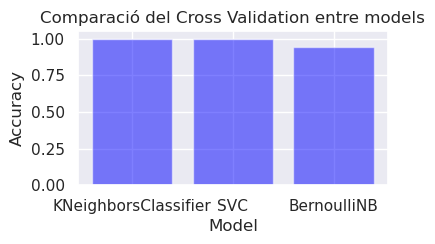

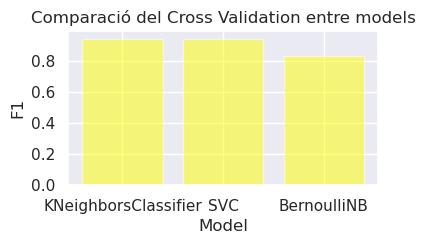

In [535]:
plt.figure(figsize=(4, 2))
plt.bar(metrics1['Model'], metrics1['ACC'], color='blue', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparació del Cross Validation entre models')
plt.show()


plt.figure(figsize=(4, 2))
plt.bar(metrics1['Model'], metrics1['F1'], color='yellow', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('Comparació del Cross Validation entre models')
plt.show()



Entrenant els models amb diferents paràmetres hem pogut comprovar que han obtingut un
nivell de precisió més alt en tots tres els casos. Tot i que anteriorment tampoc eren massa dolents, ara hem passat en concret a tenir el màxim de la puntuació, ja sigui en el model de KNeighborsClassifier i en el de SVC. El model BernoulliNB, en canvi, tot i que ha millorat de 0.83 a 0.94, és el pitjor de tots tres per la qual cosa vindria exclòs.

# - Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

    
He aplicat la normalització, estandarització i el Robuscaler en el preprocessat dels exercicis anteriors, abans d'aplicar el test/ train.